<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/Admission_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import the dependancyes
import pandas as pd
import numpy as np

In [2]:
# Import the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/learn outside/Admission_Predict_Ver1.1.csv')

### Data overview

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Check for shape
data.shape

(500, 9)

In [6]:
#Check for info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
data.duplicated().sum()

0

### Feature extraction

In [9]:
data.drop(columns = 'Serial No.',inplace = True)


In [10]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
x = data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [15]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [16]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =1)

In [19]:
print(x_train.shape,x_test.shape)

(400, 7) (100, 7)


In [21]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1


In [20]:
# Using min max scaler for data standrize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.fit_transform(x_test)

In [22]:
x_train_scal

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

### Train ANN

In [23]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense 

In [33]:
model = Sequential()
model.add(Dense(7,activation ='relu',input_dim=7))
model.add(Dense(7,activation ='relu'))
model.add(Dense(1,activation ='linear'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [41]:
history = model.fit(x_train_scal,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 9/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch

In [43]:
y_pred = model.predict(x_test_scal)

4/4 [==============================] - 0s 2ms/step


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7762766679736739

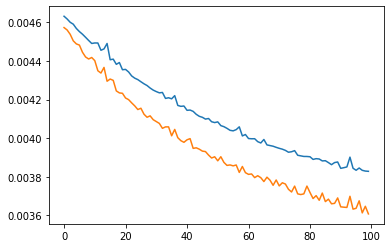

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])